# Análisis Exploratorio de Datos (EDA) - Notebook 01

## Objetivo
El objetivo de este notebook es realizar un Análisis Exploratorio de Datos (EDA) inicial de nuestro conjunto de datos. El EDA es un paso crucial en el proceso de Machine Learning que nos permite entender mejor la naturaleza y las características de los datos con los que estamos trabajando. Esto incluye la identificación de patrones, anomalías, tendencias y relaciones clave entre las variables.

## Metodología
En este notebook, llevaremos a cabo las siguientes tareas:
1. **Carga de Datos**: Importaremos el conjunto de datos a partir de su fuente original.
2. **Visualización de Datos**: Utilizaremos diversas técnicas de visualización para entender las distribuciones y relaciones entre las variables.
3. **Análisis Estadístico Preliminar**: Realizaremos análisis estadísticos básicos para obtener una comprensión inicial sobre la centralidad y dispersión de los datos.
4. **Limpieza de Datos**: Identificaremos y trataremos problemas comunes en los datos como valores faltantes, datos atípicos y errores de formato.
5. **Documentación de Hallazgos**: Resumiremos los hallazgos clave que podrían informar las fases subsecuentes de preprocesamiento y modelado.

## Resultados Esperados
Al final de este notebook, esperamos tener un conocimiento profundo y detallado del conjunto de datos que permitirá tomar decisiones informadas sobre las técnicas de preprocesamiento y modelado más adecuadas. También documentaremos problemas y características interesantes que requerirán atención especial en las etapas siguientes del proyecto.
).

---

<br>
<br>

# Importar las librerías necesarias

La siguiente celda reuna las importaciones de todas las librerías, clases y métodos que se utilizan en este Jupyter Notebook.

In [1]:
# Librerías de análisis y manipulación de datos
import numpy as np
import pandas as pd

# Librerías de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Otros
import os
import json
import warnings

warnings.filterwarnings(action = "ignore")

---

<br>
<br>

# Cargando el conjunto de datos

El conjunto de datos se divide, en este caso, en dos ficheros .csv diferentes:

* **primary_data.csv** . Contiene información sobre cada una de las especies de champiñones sobre la que se tiene información.
* **secondary_data.csv** . Contiene 61069 registros de hipotéticos champiñones, registrando un total de 353 instancias para cada una de las 173 especies que se registran en el fichero "primary_data.csv".

Voy a comenzar analizando el contenido del primer fichero, y tratar de comprender la información que este registra, para ver como se diferencian cada una de las especies de champiñones.

In [2]:
## Cargo el conjunto de datos del fichero "primary_data.csv" en memoria

# Ruta del fichero "primary_data.csv"
primary_data_path = "../data/primary_data.csv"

# Defino un objeto DataFrame que cargue en memoria el fichero .csv
primary_data_df = pd.read_csv(primary_data_path, sep= ";", low_memory = False)

# 10 primeros registros del DataFrame\
primary_data_df.head(10)

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"
5,Amanita Family,False Death Cap,e,"[4, 9]",[x],NaN,"[w, y]",[f],[e],NaN,...,[b],NaN,"[w, y]",[u],"[y, w]",[t],[g],NaN,[d],"[u, a]"
6,Amanita Family,Destroying Angel,p,"[5, 10]",[b],[t],[w],[f],[e],[c],...,NaN,[y],[w],[u],[w],[t],"[l, e]",NaN,[d],"[u, a]"
7,Amanita Family,Tawny Grisette,e,"[4, 8]","[c, x]","[h, t]",[n],[f],[e],NaN,...,NaN,[s],"[w, n]",[u],[w],[f],[f],NaN,[d],"[u, a]"
8,Lepiota Family,Parasol Mushroom,e,"[10, 25]","[p, f]",[y],"[w, n]",[f],NaN,NaN,...,[s],NaN,[n],NaN,NaN,[t],[m],NaN,"[m, d]","[u, a]"
9,Lepiota Family,Shaggy Parasol,e,"[12, 18]",[x],"[e, y]",[n],[t],[e],NaN,...,NaN,NaN,[w],NaN,NaN,[t],NaN,NaN,"[g, d]","[u, a]"


---

<br>
<br>

# Analizando el conjunto de datos

En las siguientes celdas tratamos de consultar información clave del dataset, que nos ayuden a mejorar nuestro entendimiento sobre estos datos.

In [3]:
# Reviso la informacion del DataFrame
primary_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   family                173 non-null    object
 1   name                  173 non-null    object
 2   class                 173 non-null    object
 3   cap-diameter          173 non-null    object
 4   cap-shape             173 non-null    object
 5   Cap-surface           133 non-null    object
 6   cap-color             173 non-null    object
 7   does-bruise-or-bleed  173 non-null    object
 8   gill-attachment       145 non-null    object
 9   gill-spacing          102 non-null    object
 10  gill-color            173 non-null    object
 11  stem-height           173 non-null    object
 12  stem-width            173 non-null    object
 13  stem-root             27 non-null     object
 14  stem-surface          65 non-null     object
 15  stem-color            173 non-null    ob

### Reviso el registro de nulos

Es importante determinar la proporción de registros nulos con los que contamos en el conjunto de datos.

In [4]:
null_counter = primary_data_df.isna().sum()
primary_data_df_columns = primary_data_df.columns

for column in primary_data_df_columns:
    if primary_data_df[column].isna().sum() == 0:
        continue
    nulls_on_column = primary_data_df[column].isna().sum()
    print(f"Se registran {nulls_on_column} nulos para la columna '{column}' ({round(nulls_on_column/len(primary_data_df)*100, 2)}% del total de especies)")

Se registran 40 nulos para la columna 'Cap-surface' (23.12% del total de especies)
Se registran 28 nulos para la columna 'gill-attachment' (16.18% del total de especies)
Se registran 71 nulos para la columna 'gill-spacing' (41.04% del total de especies)
Se registran 146 nulos para la columna 'stem-root' (84.39% del total de especies)
Se registran 108 nulos para la columna 'stem-surface' (62.43% del total de especies)
Se registran 164 nulos para la columna 'veil-type' (94.8% del total de especies)
Se registran 152 nulos para la columna 'veil-color' (87.86% del total de especies)
Se registran 7 nulos para la columna 'ring-type' (4.05% del total de especies)
Se registran 155 nulos para la columna 'Spore-print-color' (89.6% del total de especies)


Podemos ver como contamos con una gran proporción de registros nulos para las columnas con ausencia de datos. Debido a la naturaleza propia de este conjunto de datos, donde todas las variables son categóricas, no es posible estimar el valor faltante para cada uno de los registros que tienen nulos, intentando asegurar un cierto grado de precisión.

En este caso, obviaré estas columnas dentro de mi análisis y posterior modelización.

In [5]:
# Elimino las columnas con regsitros nulos
primary_data_df.dropna(axis = 1, how = "any", inplace = True)

# Reviso nuevamente el registro de nulos para cada columna
primary_data_df.isna().sum()

family                  0
name                    0
class                   0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
habitat                 0
season                  0
dtype: int64

In [6]:
# Muestro los primeros 10 ejemplos del DataFrame
primary_data_df.head(10)

,family,name,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[e, o]",[f],[w],"[15, 20]","[15, 20]",[w],[t],[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[n],[f],[w],"[6, 10]","[10, 20]",[w],[t],[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]","[g, n]",[f],[w],"[10, 12]","[10, 20]",[w],[t],[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",[n],[t],[w],"[7, 15]","[10, 25]",[w],[t],[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[r],[f],[w],"[10, 12]","[10, 20]",[w],[t],[d],"[u, a]"
5,Amanita Family,False Death Cap,e,"[4, 9]",[x],"[w, y]",[f],[w],"[5, 7]","[10, 15]","[w, y]",[t],[d],"[u, a]"
6,Amanita Family,Destroying Angel,p,"[5, 10]",[b],[w],[f],[w],"[10, 15]","[10, 15]",[w],[t],[d],"[u, a]"
7,Amanita Family,Tawny Grisette,e,"[4, 8]","[c, x]",[n],[f],[w],"[10, 15]","[10, 15]","[w, n]",[f],[d],"[u, a]"
8,Lepiota Family,Parasol Mushroom,e,"[10, 25]","[p, f]","[w, n]",[f],[w],"[15, 35]","[15, 25]",[n],[t],"[m, d]","[u, a]"
9,Lepiota Family,Shaggy Parasol,e,"[12, 18]",[x],[n],[t],[w],"[8, 12]","[15, 20]",[w],[t],"[g, d]","[u, a]"


Voy a hacer un breve procesamiento de este dataset, para poder analizarlo de manera detallada.

En concreto, voy a convertir las variables cuyo rango de valores este dentro de un conjunto finito de posibilidades a OneHot, mientras que las variables cuyos posibles valores son numericos, seran procesadas por bucketizacion.

---

<br>
<br>

## Procesamiento de caracteristicas

Se puede apreciar como los valores de las variables estan contenidas en "listas", por lo que deberemos de procesar estas listas inicialmente.

Realmente, estas listas se muestran debido a que la informacion se almacena dentro del .csv en formato JSON.

### Procesando las variables numericas

In [7]:
print(json.loads(primary_data_df.loc[0][3]))

[10, 20]


In [8]:
primary_data_df['cap-diameter'].unique()

array(['[10, 20]', '[5, 10]', '[10, 15]', '[5, 15]', '[5, 12]', '[4, 9]',
       '[4, 8]', '[10, 25]', '[12, 18]', '[2, 5]', '[1, 4]', '[8, 20]',
       '[3, 6]', '[2, 4]', '[6, 12]', '[0.7, 1.3]', '[0.5, 1]', '[2, 6]',
       '[1, 3]', '[2, 3]', '[1, 2]', '[0.5, 1.5]', '[0.4, 1]', '[4, 10]',
       '[2, 7]', '[3, 10]', '[3, 7]', '[3, 8]', '[6, 10]', '[4, 12]',
       '[4, 7]', '[3, 5]', '[6, 15]', '[8, 25]', '[7, 15]', '[8, 15]',
       '[7, 20]', '[6, 18]', '[5, 20]', '[8, 12]', '[8, 30]', '[8, 14]',
       '[5, 14]', '[12, 25]', '[2, 10]', '[2, 8]', '[5, 18]', '[3, 12]',
       '[6, 14]', '[50]', '[1, 1.5]'], dtype=object)

En la documentacion del dataset no se especifica informacion acerca de que representa cada valor dentro de estas listas. No obstante, se asumira que trabajamos con rangos, por lo que el primer elemento representaria el valor minimo, y el segundo elemento, el valor maximo.

In [9]:
# Defino una funcion para procesar la variable numerica
def process_numerical_range_variable(dataset, column):
    """
    Funcion auxiliar que se encarga de procesar una variable numérica en forma de rango (almacenada como JSON string)
    dentro del dataset, y generar nuevas columnas con los valores mínimos y máximos extraídos del rango.

    Args:
        dataset (pd.DataFrame): Dataframe con el conjunto de datos.
        column (str): Nombre de la columna a procesar que contiene rangos como strings JSON.

    Returns:
        pd.DataFrame: Dataframe con las nuevas columnas de valores mínimos y máximos, con la columna original eliminada.
    """
    
    # Verifico que tanto el dataset como la columna estén definidos
    if dataset is None or column is None:
        raise ValueError("Se requiere un dataframe y el nombre de una columna.")

    # Asumo que los valores son strings de JSON que representan listas con dos elementos
    try:
        # Extraigo los rangos de la columna y los convierto de JSON a listas de Python
        dataset[column] = dataset[column].apply(json.loads)
    except json.JSONDecodeError:
        raise ValueError(f"Error al decodificar JSON en la columna {column}")

    # Extraigo los valores mínimos y máximos
    dataset[f"{column}_low_value"] = dataset[column].apply(lambda x: float(x[0]) if len(x) > 0 else None)
    dataset[f"{column}_high_value"] = dataset[column].apply(lambda x: float(x[1]) if len(x) > 1 else x[0] if len(x) > 0 else None)

    # Elimino la columna original
    dataset.drop(columns=[column], inplace=True)
    
    return dataset

In [10]:
## Proceso las columnas con valores numericos del DataFrame
primary_data_df = process_numerical_range_variable(dataset = primary_data_df,
                                                      column = "cap-diameter")
primary_data_df = process_numerical_range_variable(dataset = primary_data_df,
                                                      column = "stem-height")
primary_data_df = process_numerical_range_variable(dataset = primary_data_df,
                                                      column = "stem-width")

In [11]:
# Muestro los primeros 5 registros del dataframe
primary_data_df.head()

,family,name,class,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-color,has-ring,habitat,season,cap-diameter_low_value,cap-diameter_high_value,stem-height_low_value,stem-height_high_value,stem-width_low_value,stem-width_high_value
0,Amanita Family,Fly Agaric,p,"[x, f]","[e, o]",[f],[w],[w],[t],[d],"[u, a, w]",10.0,20.0,15.0,20.0,15.0,20.0
1,Amanita Family,Panther Cap,p,"[p, x]",[n],[f],[w],[w],[t],[d],"[u, a]",5.0,10.0,6.0,10.0,10.0,20.0
2,Amanita Family,False Panther Cap,p,"[x, f]","[g, n]",[f],[w],[w],[t],[d],"[u, a]",10.0,15.0,10.0,12.0,10.0,20.0
3,Amanita Family,The Blusher,e,"[x, f]",[n],[t],[w],[w],[t],[d],"[u, a]",5.0,15.0,7.0,15.0,10.0,25.0
4,Amanita Family,Death Cap,p,"[x, f]",[r],[f],[w],[w],[t],[d],"[u, a]",5.0,12.0,10.0,12.0,10.0,20.0


In [12]:
unicos = primary_data_df['cap-shape'].unique()

In [13]:
valores = []
for value in unicos:
    try:
        if isinstance(value, str):
            # Modificar la cadena para que se convierta en un formato JSON válido.
            # Esto incluye añadir comillas dobles alrededor de los elementos para que sean cadenas JSON válidas.
            formatted_value = value.replace("[", '["').replace("]", '"]').replace(", ", '", "')
            # Cargar la cadena formateada como JSON
            json_value = json.loads(formatted_value)
            valores.append(json_value)
    except json.JSONDecodeError as e:
        # Imprime el valor que causó el error y el mensaje de error
        print(f"Error decodificando JSON para el valor '{value}': {e}")

print(valores)

[['x', 'f'], ['p', 'x'], ['x'], ['b'], ['c', 'x'], ['p', 'f'], ['b', 'f'], ['f', 's'], ['x', 'f', 's'], ['s'], ['f'], ['c'], ['c', 'x', 'f'], ['b', 'f', 's'], ['b', 'x'], ['x', 's'], ['c', 'f'], ['p'], ['b', 'x', 'f'], ['p', 'x', 'f'], ['f', 'x'], ['p', 'b'], ['x', 'p'], ['s', 'o'], ['o'], ['x', 'o'], ['p', 'c', 'o']]


In [14]:
# Defino una lista con los posibles valores para la columna en cuestion
unique_values = []
for value in valores:
    for _ in value:
        if _ not in unique_values:
            unique_values.append(_)

In [15]:
# Muestro que se hayan almacenado solamente los valores unicos para la caracteristica
unique_values

['x', 'f', 'p', 'b', 'c', 's', 'o']

### Procesando las variables categoricas

En las siguientes celdas, se procesaran las caracteristicas que registran valores dentro de un conjunto finito de posibilidades. Esta variables seran codificadas como OneHot dentro del dataframe, lo que nos facilitara el posterior analisis.

El procesamiento de estas caracteristicas aplica una logica bastante similar a la empleada en el procesamiento de las variables numericas, aunque se debera procesar el contenido como se ha visto en las celdas anteriores, puesto que los valores no se registran como JSON de la manera esperada.

In [16]:
def process_categorical_variable(dataset, column):
    """
    Función auxiliar que se encarga de procesar una variable categórica (almacenada como string en formato de lista Python)
    dentro del dataset, y generar nuevas columnas dummy con codificación One Hot.

    Args:
        dataset (pd.DataFrame): Dataframe con el conjunto de datos.
        column (str): Nombre de la columna a procesar que contiene listas como strings de formato de lista Python.

    Returns:
        pd.DataFrame: Dataframe con las nuevas columnas dummy, con la columna original eliminada.
    """

    # Extraigo los valores únicos y los convierto correctamente desde su formato de string
    unique_values = set()
    for row in dataset[column]:
        try:
            # Formatear la cadena para que se convierta en un formato JSON válido
            formatted_row = row.replace("[", '["').replace("]", '"]').replace(", ", '", "')
            # Cargar la cadena formateada como JSON
            json_row = json.loads(formatted_row)
            unique_values.update(json_row)
        except json.JSONDecodeError as e:
            # Imprime el valor que causó el error y el mensaje de error
            print(f"Error decodificando JSON para el valor '{row}': {e}")

    # Proceso el conjunto de valores unicos
    unique_values = [_ for _ in unique_values]
    
    # Creo columnas dummy para cada valor único (menos uno para evitar la colinealidad)
    for value in unique_values[:]:  # USAMOS TODO EL ESPACIO DE POSIBILIDADES; ESTO DEBERIA SER MODIFICADO AL MODELIZAR EL DATASET
        dataset[f"{column}_{value}"] = dataset[column].apply(lambda x: 1 if value in json.loads(x.replace("[", '["').replace("]", '"]').replace(", ", '", "')) else 0)

    # Eliminar la columna original si así se desea
    dataset.drop(column, axis=1, inplace=True)

    return dataset

In [17]:
primary_data_df = process_categorical_variable(dataset = primary_data_df,
                                               column = "cap-shape")
primary_data_df = process_categorical_variable(dataset = primary_data_df,
                                               column = "cap-color")
primary_data_df = process_categorical_variable(dataset = primary_data_df,
                                               column = "does-bruise-or-bleed")
primary_data_df = process_categorical_variable(dataset = primary_data_df,
                                               column = "gill-color")
primary_data_df = process_categorical_variable(dataset = primary_data_df,
                                               column = "stem-color")
primary_data_df = process_categorical_variable(dataset = primary_data_df,
                                               column = "has-ring")
primary_data_df = process_categorical_variable(dataset = primary_data_df,
                                               column = "habitat")
primary_data_df = process_categorical_variable(dataset = primary_data_df,
                                               column = "season")

In [18]:
primary_data_df.head()

,family,name,class,cap-diameter_low_value,cap-diameter_high_value,stem-height_low_value,stem-height_high_value,stem-width_low_value,stem-width_high_value,cap-shape_x,...,habitat_u,habitat_g,habitat_l,habitat_p,habitat_h,habitat_w,season_a,season_s,season_u,season_w
0,Amanita Family,Fly Agaric,p,10.0,20.0,15.0,20.0,15.0,20.0,1,...,0,0,0,0,0,0,1,0,1,1
1,Amanita Family,Panther Cap,p,5.0,10.0,6.0,10.0,10.0,20.0,1,...,0,0,0,0,0,0,1,0,1,0
2,Amanita Family,False Panther Cap,p,10.0,15.0,10.0,12.0,10.0,20.0,1,...,0,0,0,0,0,0,1,0,1,0
3,Amanita Family,The Blusher,e,5.0,15.0,7.0,15.0,10.0,25.0,1,...,0,0,0,0,0,0,1,0,1,0
4,Amanita Family,Death Cap,p,5.0,12.0,10.0,12.0,10.0,20.0,1,...,0,0,0,0,0,0,1,0,1,0


In [19]:
primary_data_df.columns

Index(['family', 'name', 'class', 'cap-diameter_low_value',
       'cap-diameter_high_value', 'stem-height_low_value',
       'stem-height_high_value', 'stem-width_low_value',
       'stem-width_high_value', 'cap-shape_x', 'cap-shape_b', 'cap-shape_o',
       'cap-shape_f', 'cap-shape_c', 'cap-shape_p', 'cap-shape_s',
       'cap-color_b', 'cap-color_w', 'cap-color_y', 'cap-color_o',
       'cap-color_r', 'cap-color_u', 'cap-color_n ,w', 'cap-color_g',
       'cap-color_l', 'cap-color_k', 'cap-color_p', 'cap-color_n',
       'cap-color_e', 'does-bruise-or-bleed_t', 'does-bruise-or-bleed_f',
       'gill-color_b', 'gill-color_u', 'gill-color_y', 'gill-color_r',
       'gill-color_o', 'gill-color_k', 'gill-color_g', 'gill-color_e',
       'gill-color_f', 'gill-color_p', 'gill-color_n', 'gill-color_w',
       'stem-color_b', 'stem-color_u', 'stem-color_y', 'stem-color_r',
       'stem-color_k', 'stem-color_o', 'stem-color_e', 'stem-color_l',
       'stem-color_g', 'stem-color_f', 'stem-co

---

<br>
<br>

# Análisis de los datos

Tras el procesamiento del dataset, de cara a poder facilitar el análisis de este, comenzamos con el estudio del conjunto de datos. Las siguientes celdas resumen el análisis del conjunto de datos de las diferentes especies de champiñones.

In [20]:
primary_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 71 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   family                   173 non-null    object 
 1   name                     173 non-null    object 
 2   class                    173 non-null    object 
 3   cap-diameter_low_value   173 non-null    float64
 4   cap-diameter_high_value  173 non-null    float64
 5   stem-height_low_value    173 non-null    float64
 6   stem-height_high_value   173 non-null    float64
 7   stem-width_low_value     173 non-null    float64
 8   stem-width_high_value    173 non-null    float64
 9   cap-shape_x              173 non-null    int64  
 10  cap-shape_b              173 non-null    int64  
 11  cap-shape_o              173 non-null    int64  
 12  cap-shape_f              173 non-null    int64  
 13  cap-shape_c              173 non-null    int64  
 14  cap-shape_p              1

### Distribucion de especies registradas

El conjunto de datos que estamos analizando registra informacion de diferentes familias de hongos. Comenzaremos el EDA revisando como se distribuyen las proporciones de especies entre las diferentes familias de hongos, en funcion de su clasificacion como venenoso o comestible.

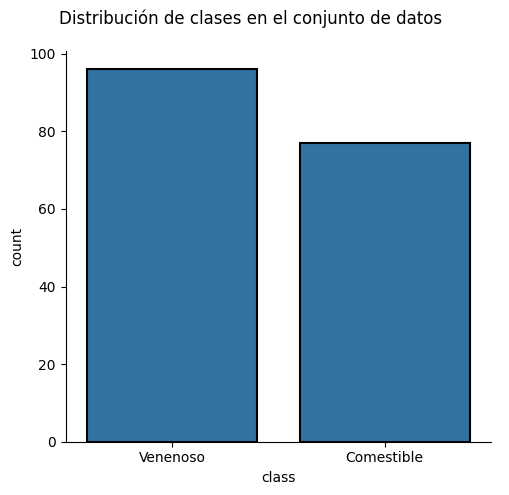

In [21]:
# Muestro las proporciones de champiñones comestibles y venenosos registrados

graph = sns.catplot(data=primary_data_df, kind="count", x="class", linewidth=1.5, edgecolor = "black")
graph.fig.suptitle("Distribución de clases en el conjunto de datos")

new_labels = ['Venenoso', 'Comestible']
graph.set_xticklabels(new_labels)

plt.tight_layout()
plt.show()

Dentro del conjunto de datos que registra los tipos de especies de champiñones, vemos que existe una mayor proporción de especies venenosas que comestibles. En la siguiente celda muestro la proporción de individuos de cada especie en las diferentes clases.

In [22]:
# Conteo de especies por cada familia dentro del dataset
family_count_dict = {}

# Itero sobre el conjunto de familias registradas en el dataset
for _ in primary_data_df['family'].unique():
    family_p = len(primary_data_df[(primary_data_df['family'] == _) & (primary_data_df['class'] == 'p')])
    family_e = len(primary_data_df[(primary_data_df['family'] == _) & (primary_data_df['class'] == 'e')])
    
    # Registro el conteo de especies por cada familia dentro del diccionario
    family_count_dict[_] = [family_p, family_e]

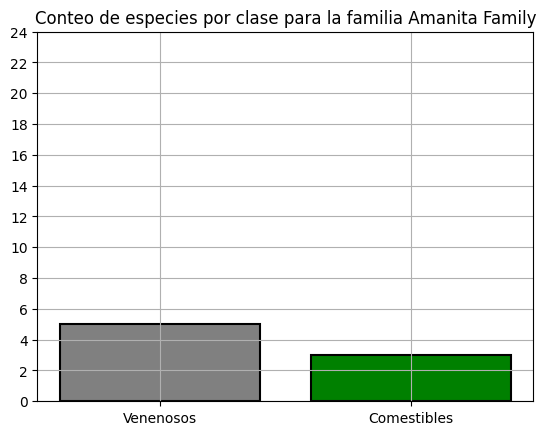

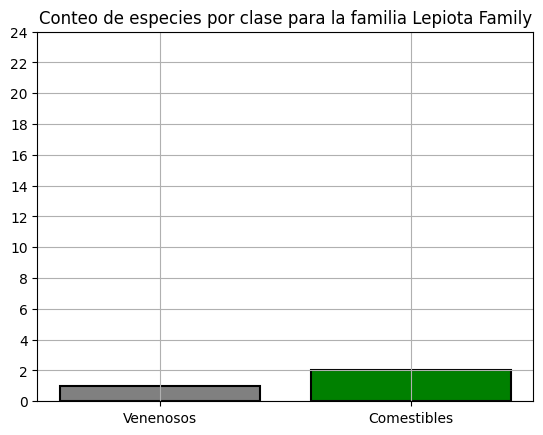

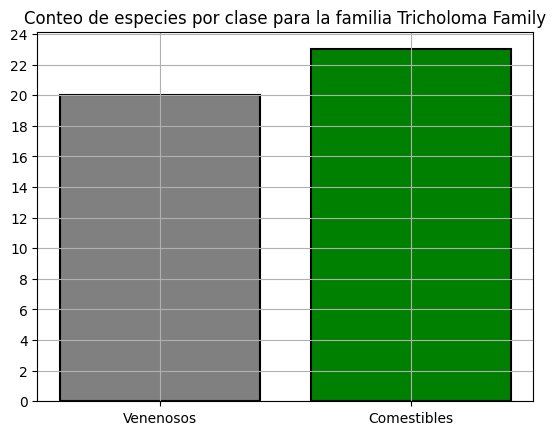

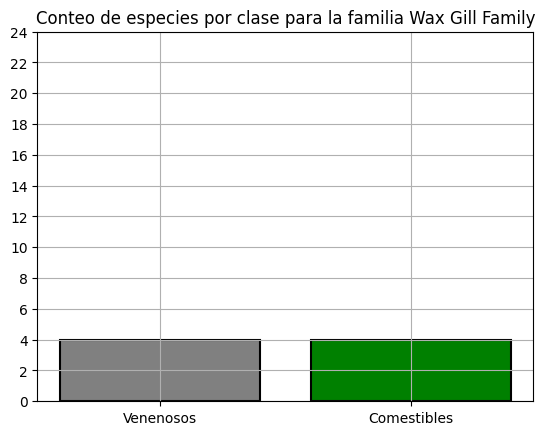

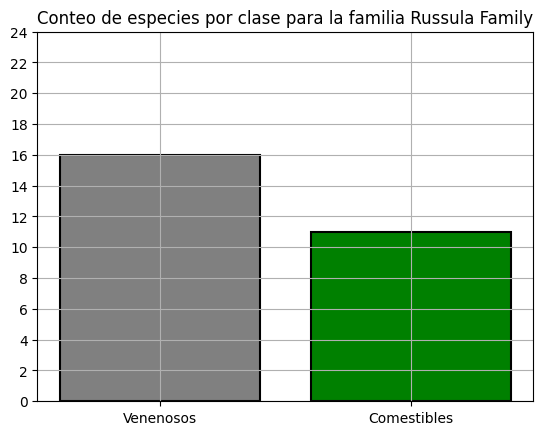

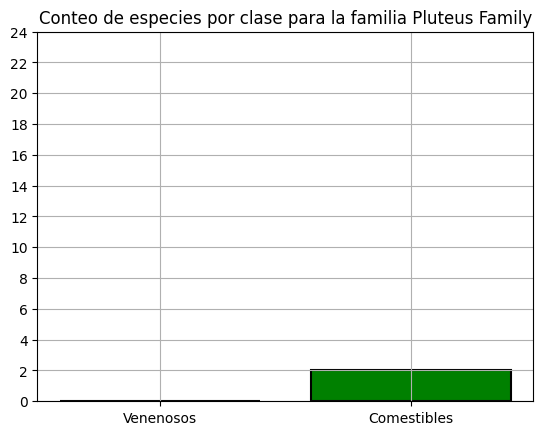

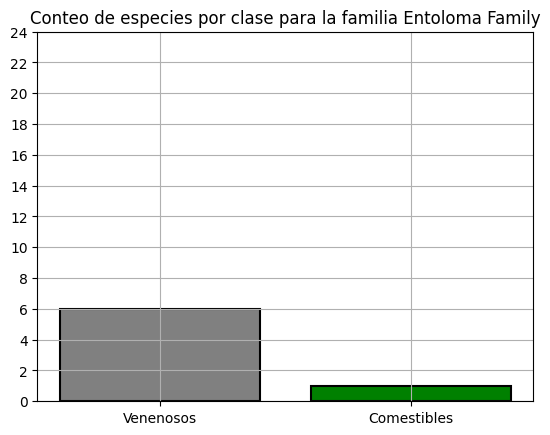

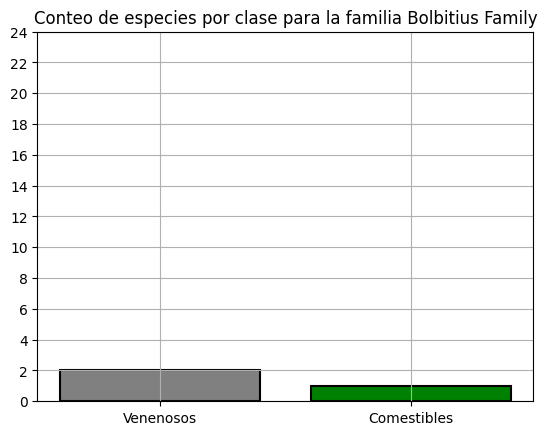

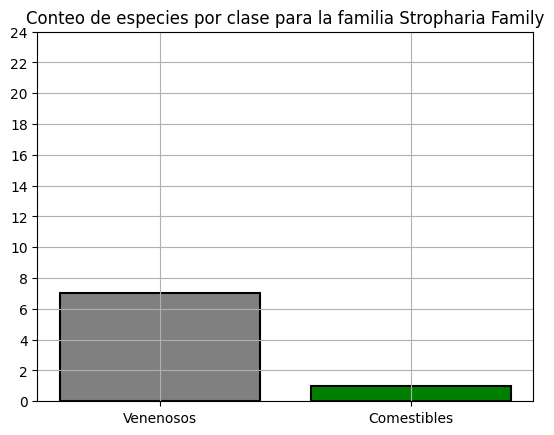

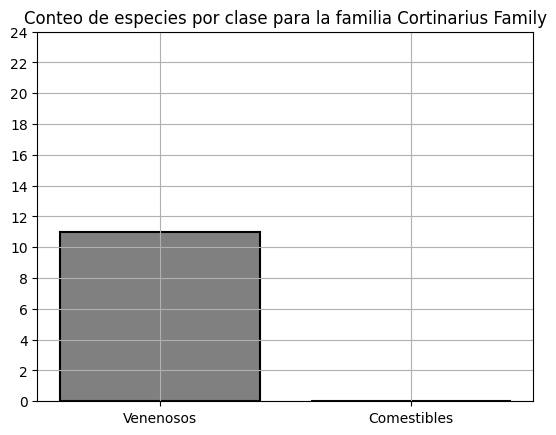

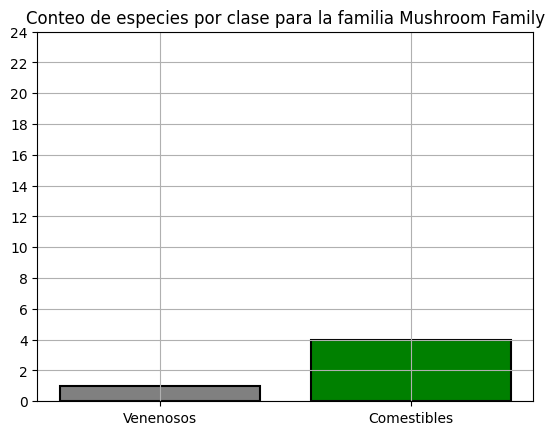

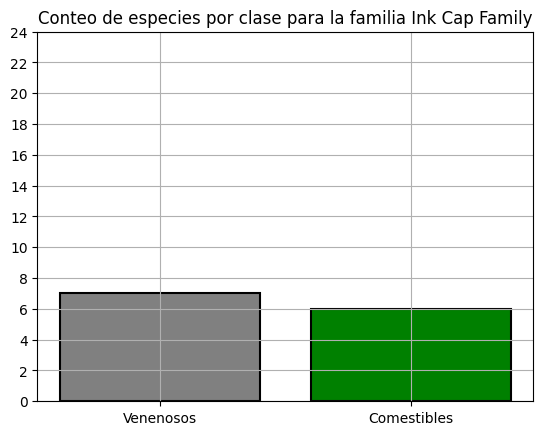

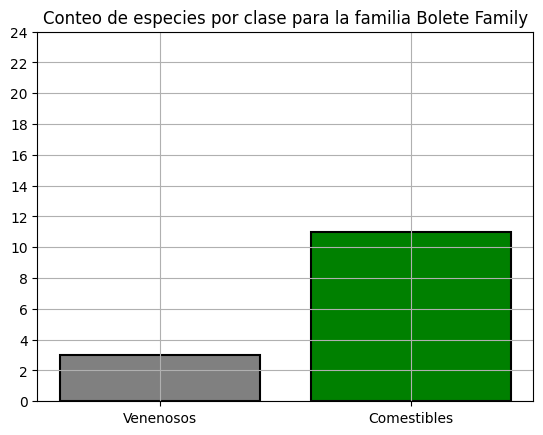

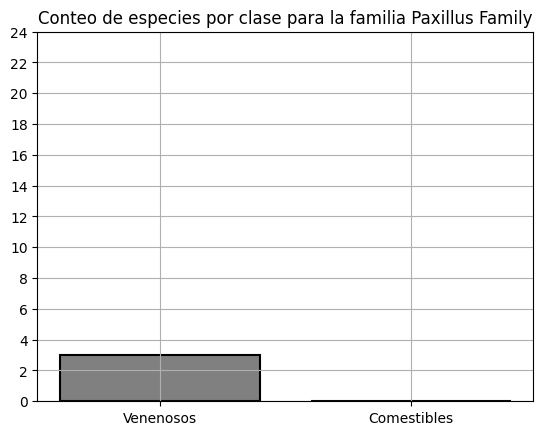

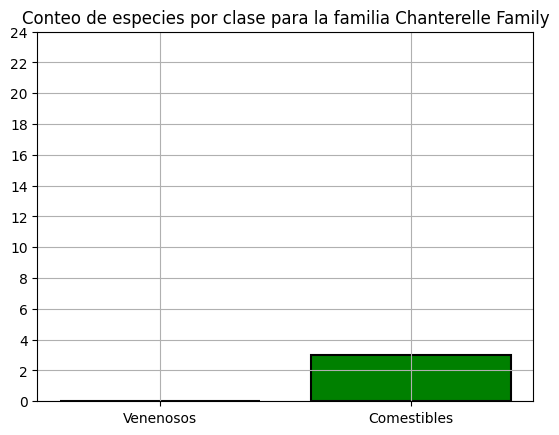

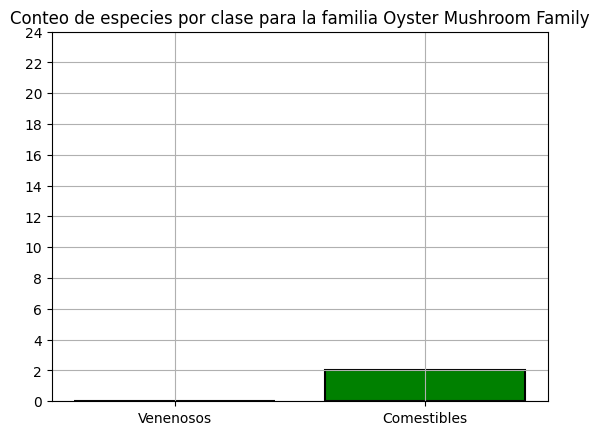

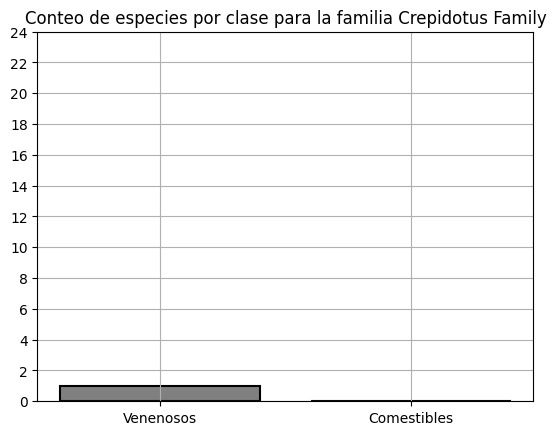

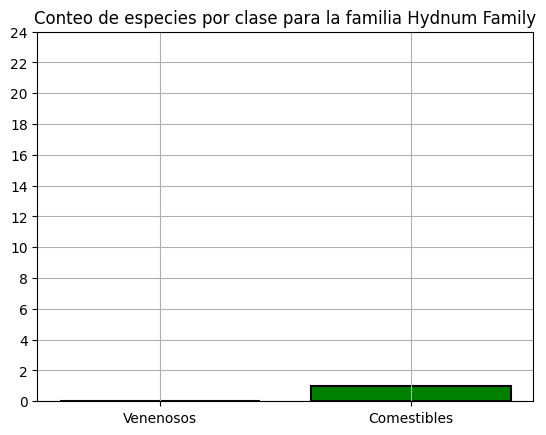

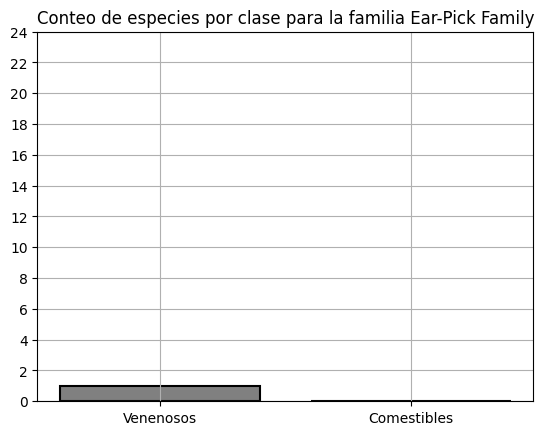

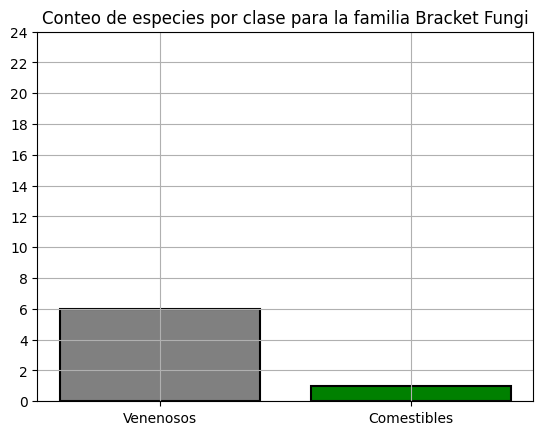

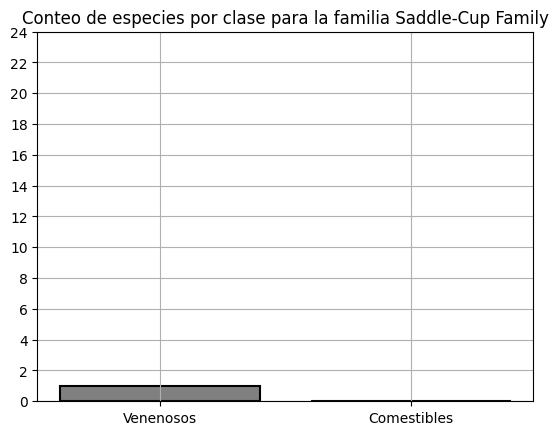

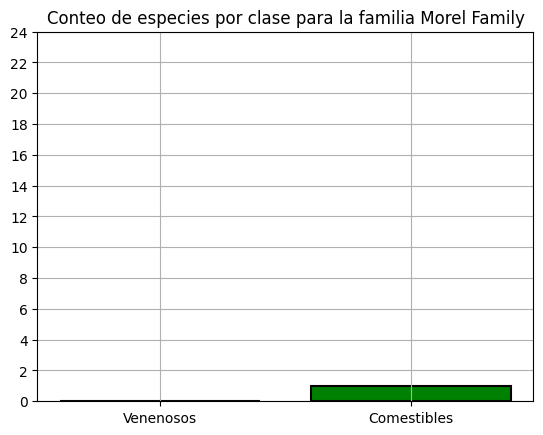

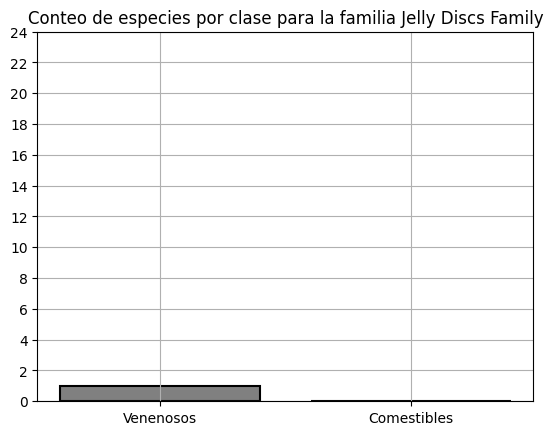

In [23]:
for family, counts in family_count_dict.items():
    # Datos para el histograma
    categories = ['Venenosos', 'Comestibles']
    
    # Creo un gráfico de barras para visualizar los conteos
    plt.bar(categories, counts, linewidth=1.5, edgecolor="black", color = ['gray', 'green'])
    plt.title(f'Conteo de especies por clase para la familia {family}')
    plt.yticks(np.arange(0, 26, 2))
    plt.grid()
    plt.show()

Las graficos anteriores muestran como, para algunas familias registradas en el conjunto de datos, la mayor parte de las especies pertenecen a una de las dos clases, lo que puede ayudar al modelo a diferir de manera mas precisa entre cada una de las especies, y predecir de manera mas fiable si una instancia dada corresponde a un champiñón comestible o venenoso.

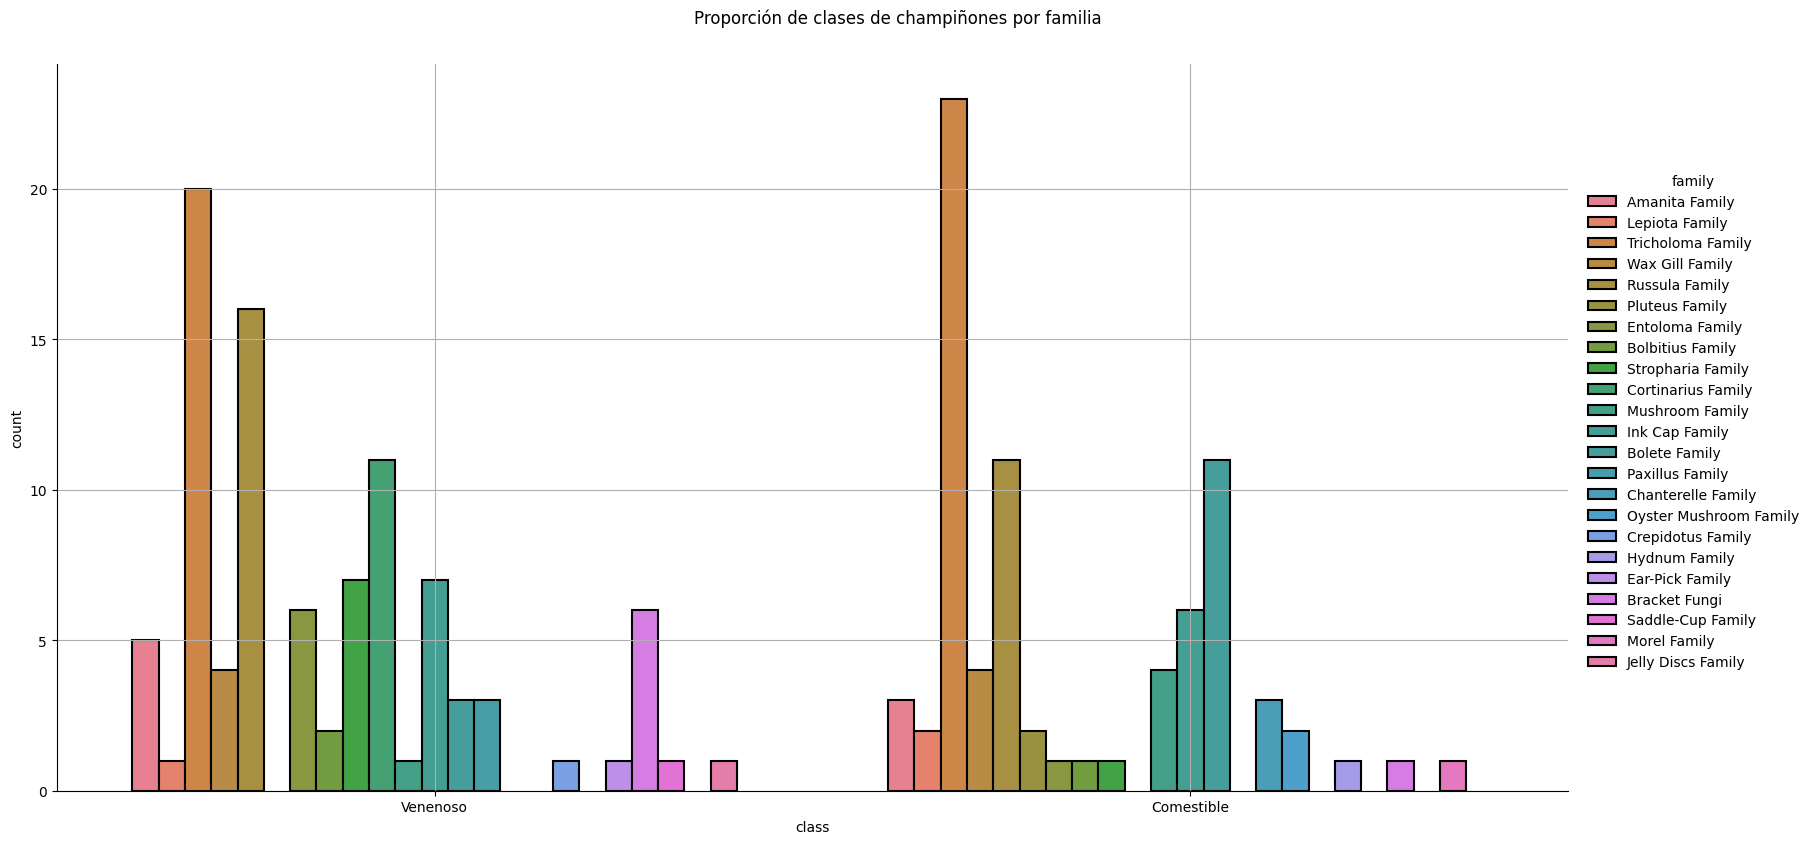

In [24]:
graph = sns.catplot(data=primary_data_df, kind="count", x="class", hue="family", height=8, aspect=2, linewidth=1.5, edgecolor = "black")
graph.fig.suptitle("Proporción de clases de champiñones por familia", y=1.05)  # Ajusto la posición del título
plt.grid()

new_labels = ['Venenoso', 'Comestible']
graph.set_xticklabels(new_labels)
plt.yticks(np.arange(0, 25, 5))
plt.show()

In [25]:
primary_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 71 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   family                   173 non-null    object 
 1   name                     173 non-null    object 
 2   class                    173 non-null    object 
 3   cap-diameter_low_value   173 non-null    float64
 4   cap-diameter_high_value  173 non-null    float64
 5   stem-height_low_value    173 non-null    float64
 6   stem-height_high_value   173 non-null    float64
 7   stem-width_low_value     173 non-null    float64
 8   stem-width_high_value    173 non-null    float64
 9   cap-shape_x              173 non-null    int64  
 10  cap-shape_b              173 non-null    int64  
 11  cap-shape_o              173 non-null    int64  
 12  cap-shape_f              173 non-null    int64  
 13  cap-shape_c              173 non-null    int64  
 14  cap-shape_p              1

### Distribución para el resto de características

Se va a revisar cómo es que se distribuyen los diferentes valores para el resto de características del dataset.
Estas características son variables categóricas, y han sido codificadas como OneHot para facilitar su procesamiento. 

**IMPORTANTE**. No se ha trabajado la posible multicolinealidad de las variables, puesto que se quiere analizar el dataset de forma completa. Este paso se llevará a cabo al momento de desarrollar el modelo de Machine Learning.

#### Cap diameter ___________________

Diámetro del sombrero, número flotante en cm. 

Para esta variable, voy a representar un gráfico de dispersión, con el que se pueda observar la evolución de los diferentes valores para cada una de las posibilidades (mínimo, máximo).

In [26]:
# Genero un nuevo dataframe con las variables a representar
cap_diameter_df = primary_data_df.copy()
cap_diameter_df = cap_diameter_df[['cap-diameter_low_value', 'cap-diameter_high_value']]


family_dict = {}
counter = 0
unique_values_list = primary_data_df['family'].unique()
for value in unique_values_list:
    family_dict[value] = counter
    counter += 1


cap_diameter_df['family'] = primary_data_df['family'].map(family_dict)
cap_diameter_df = np.array(cap_diameter_df)

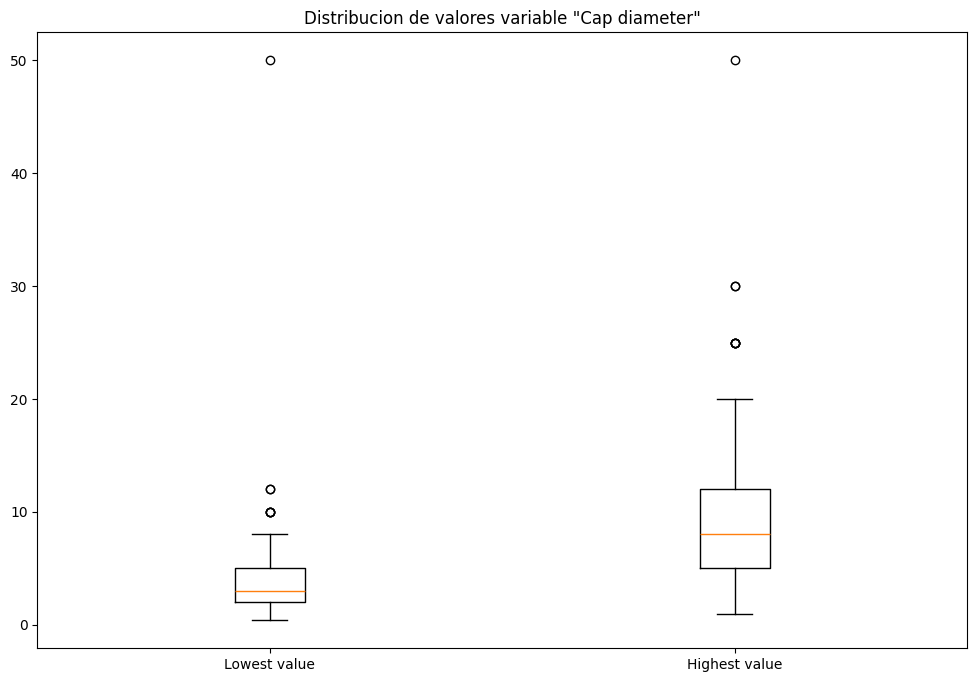

In [27]:
# Represento un grafico boxplot con los valores 
plt.figure(figsize = (12, 8))
plt.boxplot([cap_diameter_df[:, 0], cap_diameter_df[:, 1]], labels = ['Lowest value', 'Highest value'])
plt.title('Distribucion de valores variable "Cap diameter"')
plt.show()

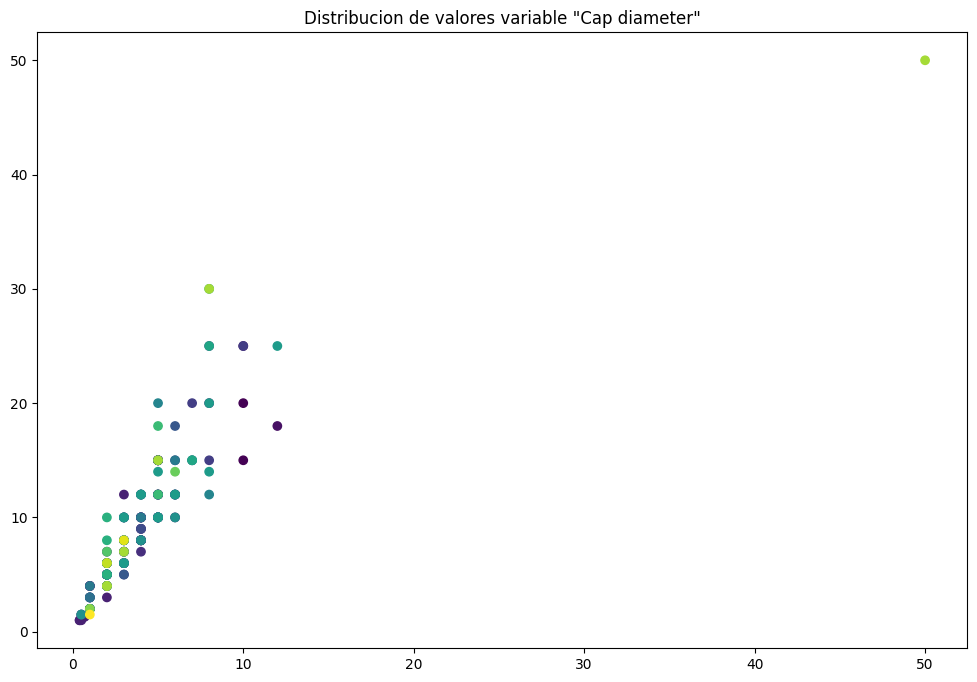

In [28]:
# Representando la variable en un grafico de dispersion
plt.figure(figsize = (12, 8))
plt.scatter(cap_diameter_df[:, 0], cap_diameter_df[:, 1], c = cap_diameter_df[:, 2])
plt.title('Distribucion de valores variable "Cap diameter"')
plt.show()

#### Stem height ___________________

Altura del tallo, número flotante en cm.

In [29]:
# Genero un nuevo dataframe con las variables a representar
stem_height_df = primary_data_df.copy()
stem_height_df = stem_height_df[['stem-height_low_value', 'stem-height_high_value']]

stem_height_df['family'] = primary_data_df['family'].map(family_dict)
stem_height_df = np.array(stem_height_df)

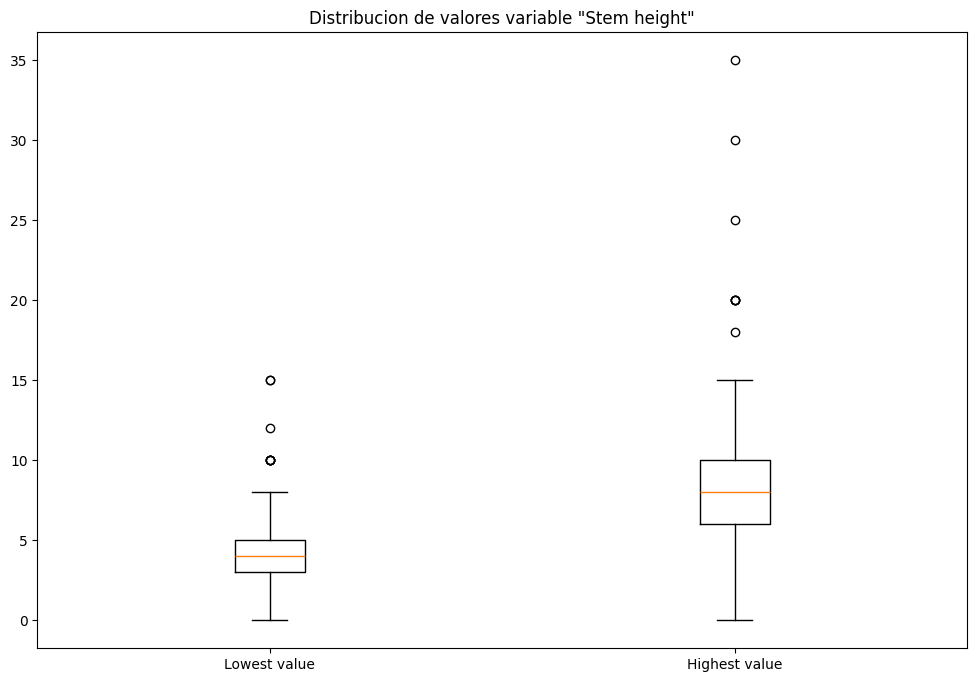

In [30]:
# Represento un grafico boxplot con los valores 
plt.figure(figsize = (12, 8))
plt.boxplot([stem_height_df[:, 0], stem_height_df[:, 1]], labels = ['Lowest value', 'Highest value'])
plt.title('Distribucion de valores variable "Stem height"')
plt.show()

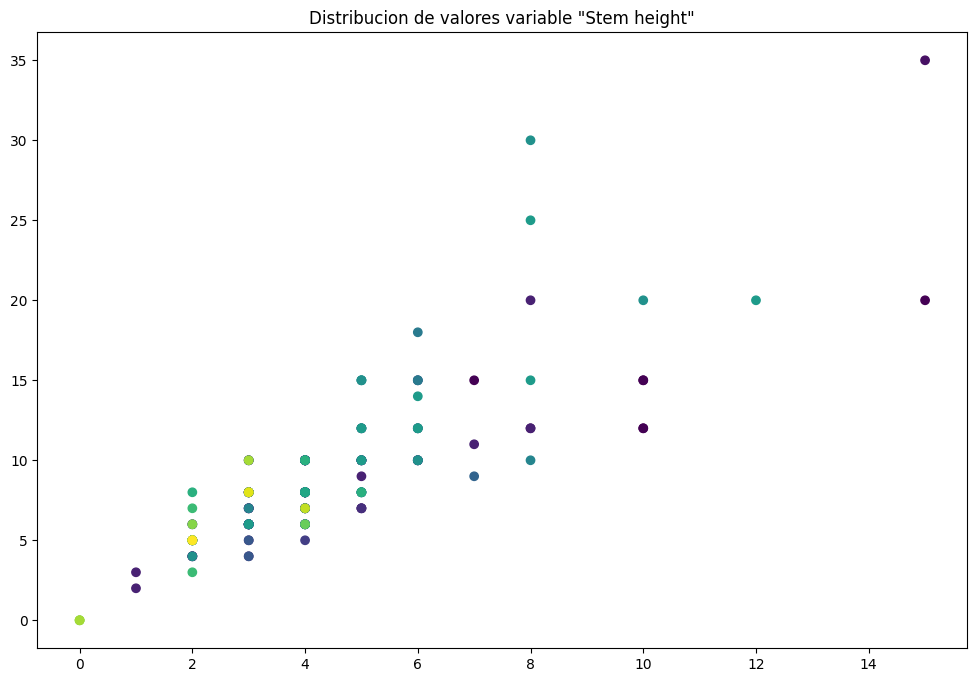

In [31]:
# Representando la variable en un grafico de dispersion
plt.figure(figsize = (12, 8))
plt.scatter(stem_height_df[:, 0], stem_height_df[:, 1], c = stem_height_df[:, 2])
plt.title('Distribucion de valores variable "Stem height"')
plt.show()

#### Cap shape ___________________

Forma del sombrero (bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o)

In [33]:
# Genero un nuevo dataframe con las variables a representar
cap_shape_df = primary_data_df.copy()
cap_shape_df = cap_shape_df[['cap-shape_x', 'cap-shape_b', 'cap-shape_o', 'cap-shape_f', 'cap-shape_c', 'cap-shape_p', 'cap-shape_s']]

cap_shape_df['family'] = primary_data_df['family'].map(family_dict)
cap_shape_df = np.array(cap_shape_df)

ValueError: Dimensions of labels and X must be compatible

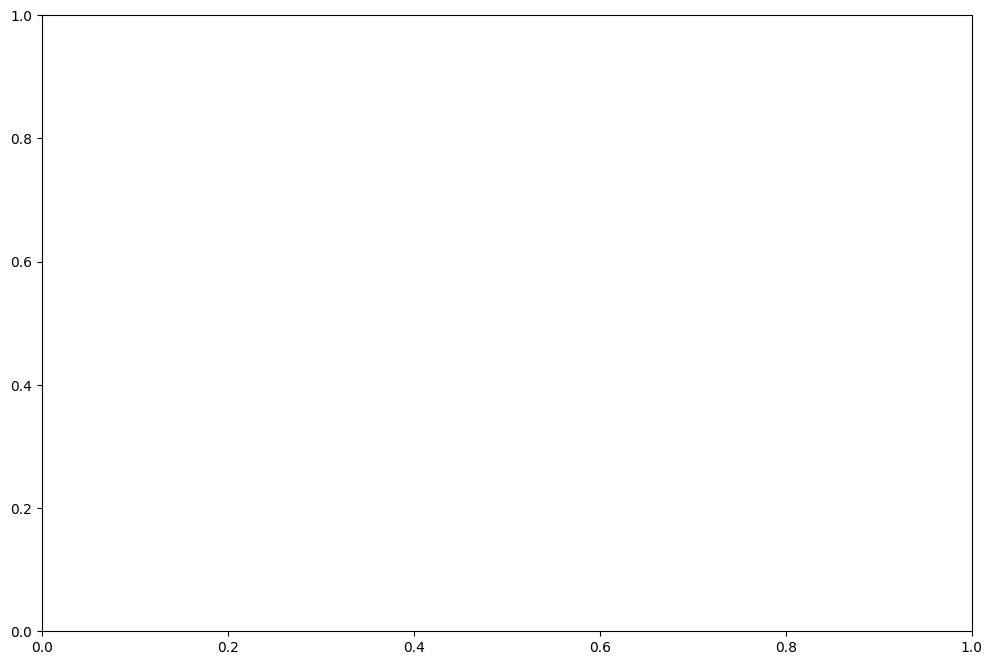

In [46]:
# Represento un grafico boxplot con los valores 
plt.figure(figsize = (12, 8))
plt.boxplot(cap_shape_df, labels=["bell", "conical", "convex", "flat", "sunken", "spherical", "others"])
plt.title('Distribucion de valores variable "Cap shape"')
plt.show()